In [1]:
!pip install pycoingecko

In [43]:
import pandas as pd
from pycoingecko import CoinGeckoAPI

# Fetch bitcoin data from CoinGecko
cg = CoinGeckoAPI()
bitcoin_data = cg.get_coin_market_chart_by_id(id='bitcoin', vs_currency='usd', days=365)

# Convert the fetched data into a DataFrame
data = pd.DataFrame(bitcoin_data['prices'], columns=['TimeStamp', 'Price'])
data['Date'] = pd.to_datetime(data['TimeStamp'], unit='ms')

# Group by date and aggregate to get candlestick data
candlestick_data = data.groupby(data.Date.dt.date).agg(
    Open=('Price', 'first'),
    High=('Price', 'max'),
    Low=('Price', 'min'),
    Close=('Price', 'last')
).reset_index()

# Rename columns for better readability
candlestick_data.columns = ['Date', 'Open', 'High', 'Low', 'Close']

# Display the candlestick data
print(candlestick_data)

           Date          Open          High           Low         Close
0    2023-06-02  26824.101500  26824.101500  26824.101500  26824.101500
1    2023-06-03  27247.740081  27247.740081  27247.740081  27247.740081
2    2023-06-04  27066.371329  27066.371329  27066.371329  27066.371329
3    2023-06-05  27315.447587  27315.447587  27315.447587  27315.447587
4    2023-06-06  25792.616090  25792.616090  25792.616090  25792.616090
..          ...           ...           ...           ...           ...
360  2024-05-27  68508.831109  68508.831109  68508.831109  68508.831109
361  2024-05-28  69367.238718  69367.238718  69367.238718  69367.238718
362  2024-05-29  68316.635880  68316.635880  68316.635880  68316.635880
363  2024-05-30  67577.265590  67577.265590  67577.265590  67577.265590
364  2024-05-31  68372.492884  68372.492884  67893.397559  67893.397559

[365 rows x 5 columns]


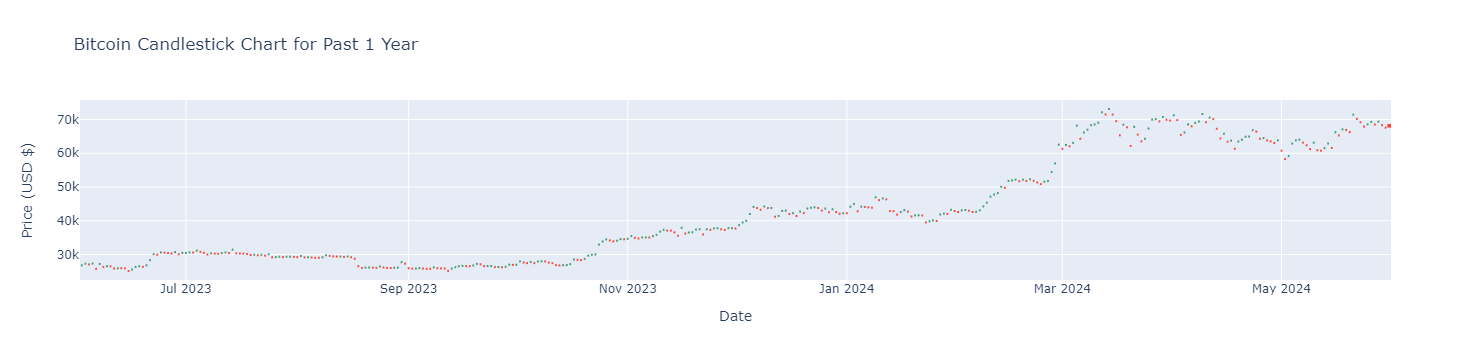

'./bitcoin_candlestick_graph.html'

In [44]:
import pandas as pd
from pycoingecko import CoinGeckoAPI
import plotly.graph_objects as go
import plotly.offline as pyo

# Fetch bitcoin data from CoinGecko
cg = CoinGeckoAPI()
bitcoin_data = cg.get_coin_market_chart_by_id(id='bitcoin', vs_currency='usd', days=365)

# Convert the fetched data into a DataFrame
data = pd.DataFrame(bitcoin_data['prices'], columns=['TimeStamp', 'Price'])
data['Date'] = pd.to_datetime(data['TimeStamp'], unit='ms')

# Group by date and aggregate to get candlestick data
candlestick_data = data.groupby(data.Date.dt.date).agg(
    Open=('Price', 'first'),
    High=('Price', 'max'),
    Low=('Price', 'min'),
    Close=('Price', 'last')
).reset_index()

# Create the candlestick chart using Plotly
fig = go.Figure(data=[go.Candlestick(
    x=candlestick_data['Date'],
    open=candlestick_data['Open'],
    high=candlestick_data['High'],
    low=candlestick_data['Low'],
    close=candlestick_data['Close']
)])

# Update layout of the chart
fig.update_layout(
    xaxis_rangeslider_visible=False,
    xaxis_title='Date',
    yaxis_title='Price (USD $)',
    title='Bitcoin Candlestick Chart for Past 1 Year'
)

# Show the figure
fig.show()

pyo.plot(fig, filename = './bitcoin_candlestick_graph.html',auto_open = False)